In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras

In [ ]:
(X_train, y_train), (X_test, y_test) =tf. keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


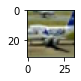

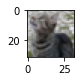

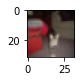

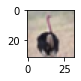

In [ ]:
for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

In [ ]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
391/391 [==============================] - 455s 1s/step - loss: 1.8784 - accuracy: 0.2979 - val_loss: 1.1821 - val_accuracy: 0.5771
Epoch 2/10
391/391 [==============================] - 441s 1s/step - loss: 1.1719 - accuracy: 0.5846 - val_loss: 0.9292 - val_accuracy: 0.6750
Epoch 3/10
391/391 [==============================] - 436s 1s/step - loss: 0.9432 - accuracy: 0.6701 - val_loss: 0.8026 - val_accuracy: 0.7235
Epoch 4/10
391/391 [==============================] - 441s 1s/step - loss: 0.8058 - accuracy: 0.7163 - val_loss: 0.7181 - val_accuracy: 0.7515
Epoch 5/10
391/391 [==============================] - 441s 1s/step - loss: 0.7189 - accuracy: 0.7491 - val_loss: 0.6950 - val_accuracy: 0.7574
Epoch 6/10
391/391 [==============================] - 437s 1s/step - loss: 0.6353 - accuracy: 0.7766 - val_loss: 0.6760 - val_accuracy: 0.7664
Epoch 7/10
391/391 [==============================] - 446s 1s/step - loss: 0.5730 - accuracy: 0.7994 - val_loss: 0.6482 - val_accuracy: 0.7758

In [ ]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 491ms/step


In [ ]:
print (predictions)

[[3.65072847e-05 6.73974398e-07 2.32173856e-02 4.07966366e-03
  5.57681382e-01 6.33376986e-02 2.11316074e-04 3.51426333e-01
  1.38073131e-06 7.67355050e-06]
 [4.22239536e-04 7.07016952e-05 4.01225388e-02 5.21886013e-02
  3.23526338e-02 4.34552222e-01 1.72001624e-03 4.38131511e-01
  1.00421465e-04 3.39043501e-04]
 [1.34621969e-05 3.78789337e-05 4.96977009e-03 5.92757110e-03
  4.79619775e-05 1.58339238e-03 9.87304628e-01 9.32166149e-05
  9.69084522e-06 1.23682830e-05]
 [3.08136896e-06 3.65590353e-07 2.64377100e-04 9.43278015e-01
  1.62422273e-03 8.78577959e-03 4.60151359e-02 2.57471384e-05
  1.36106780e-06 1.86765465e-06]
 [2.46368081e-08 9.99934793e-01 8.58009735e-13 1.18957171e-11
  4.62737691e-14 1.07315979e-12 3.08209083e-11 7.67324409e-13
  1.06196057e-05 5.45427465e-05]
 [2.30226397e-06 9.98560369e-01 1.72169194e-08 8.22633766e-08
  9.50001411e-10 1.11820198e-08 8.09658729e-07 1.21542487e-09
  8.08472105e-05 1.35562802e-03]
 [1.36658615e-02 2.01967149e-03 6.18969649e-03 6.42558873e

In [ ]:
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
0.99999994
1.0000001
1.0
1.0
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 7 6 3 1 1 3 6 8]


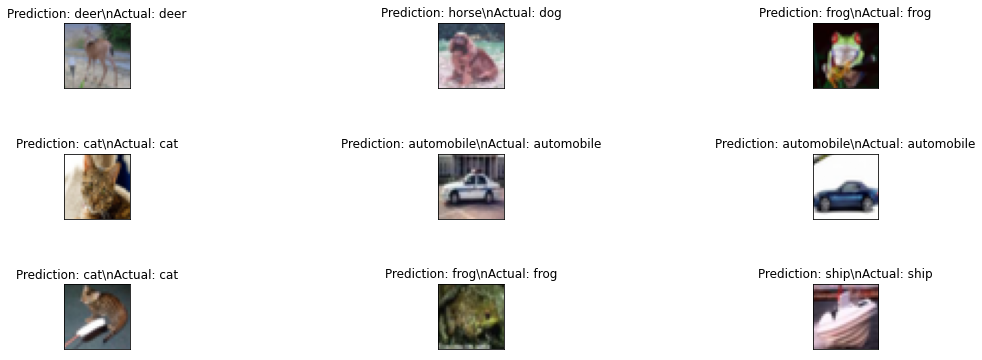

In [ ]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()